In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA


# Load the dataset from CSV
# Adding dataset using desired file path
df = pd.read_csv('Cardiac_Surgery_and_Percutaneous_Coronary_Interventions_by_Hospital___Beginning_2008.csv')

# Defining dictionary to map domain concepts to their corresponding features
# For example, the domain concept 'Hospital Identifier' corresponds to features 'Facility ID' and 'Hospital Name'
domain_concepts = {
    'Hospital Identifier': ['Facility ID', 'Hospital Name'],
    'Hospital Location': ['Detailed Region', 'Region'],
    'Medical Procedure': ['Procedure'],
    'Time Period': ['Year of Hospital Discharge'],
    'Hospital Procedure Data': ['Number of Cases'],
    'Hospital Outcome Data': ['Number of Deaths', 'Observed Mortality Rate',
                              'Expected Mortality Rate', 'Risk_Adjusted_Mortality_Rate',
                              'Lower Limit of Confidence Interval', 'Upper Limit of Confidence Interval'],
    'Comparison of Mortality Rate': ['Comparison Results']
}

# Initializing an empty DataFrame for the Analytics Base Table (ABT)
# By creating a structured table that will be used for data analysis or modeling 
# It allows us to gradually populate it with relevant information as we iterate through the domain concepts and their associated features
abt = pd.DataFrame()

# Checking each domian concept
for concept, features in domain_concepts.items():
    # Filtering out features that are not present in the dataset
    features = [col for col in features if col in df.columns]
    
    # Creating a subset of the dataset containing only the features relevant to the domain concept
    subset = df[features]
    
    # Renaming the features to match the domain concept
    #This step is essential for maintaining consistency and clarity in the ABT construction
    subset.columns = [concept if col != 'Procedure' else col for col in subset.columns]
    
    # Concatenate the subset with the ABT aggregating and consolidating the information from different domain concepts into a single, comprehensive table
    abt = pd.concat([abt, subset], axis=1)

# Display the ABT
print(abt.head())

  Hospital Identifier     Hospital Identifier        Hospital Location  \
0                   1         Albany Med. Ctr         Capital District   
1                1045   White Plains Hospital  NY Metro - New Rochelle   
2                1438   Bellevue Hospital Ctr                Manhattan   
3                1439     Beth Israel Med Ctr                Manhattan   
4                1178  Bronx-Lebanon-Cncourse                    Bronx   

         Hospital Location          Procedure Time Period  \
0         Capital District            All PCI        2016   
1  NY Metro - New Rochelle  Non-Emergency PCI        2015   
2           NY Metro - NYC            All PCI        2010   
3           NY Metro - NYC            All PCI        2010   
4           NY Metro - NYC            All PCI        2010   

   Hospital Procedure Data  Hospital Outcome Data  Hospital Outcome Data  \
0                      680                     17                   2.50   
1                      338          

**Loading the Data**

To start the code we import necessary libraries and our dataset 'Cardiac_Surgery_and_Percutaneous_Coronary_Interventions_by_Hospital___Beginning_2008.csv' using the pd.read_csv() function.

**Defining Key Concepts**

A dictionary named domain_concepts is established to link domain concepts with their features in the dataset.
Each domain concept represents a category of information such as 'Hospital Identifier' 'Hospital Location' 'Medical Procedure' among others.

The features linked with each domain concept are detailed as values in the dictionary.

**Creating the Core Analytics Table**

1. A blank DataFrame is set up to hold the Analytics Table data.
2. The code loops through each domain concept and its related features.
3. For every domain concept it extracts features present in the dataset and generates a subset of data containing only those features.
4. The feature names are adjusted to align with their domain concepts for clarity.
5. Lastly the subset is combined with DataFrame to merge and summarize information, from domain concepts into one comprehensive table view. 


The output from the ABT is shown using the print() function to exhibit the rows of the table. 

**Interpreting the Results**

The ABT encompasses domain concepts like 'Hospital Identifier' 'Hospital Location' 'Medical Procedure' 'Time Period' 'Hospital Procedure Data' 'Hospital Outcome Data' and 'Comparison of Mortality Rate'. 

Each row in the ABT corresponds to a hospital procedure record with each column representing a domain concept or feature linked to it. 

**Data Visualization**

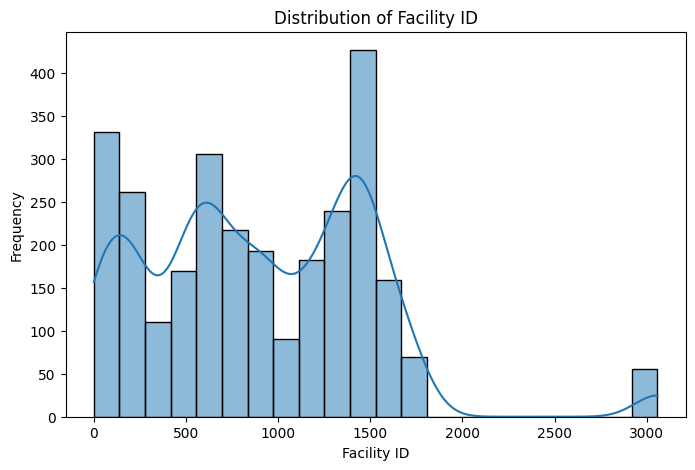

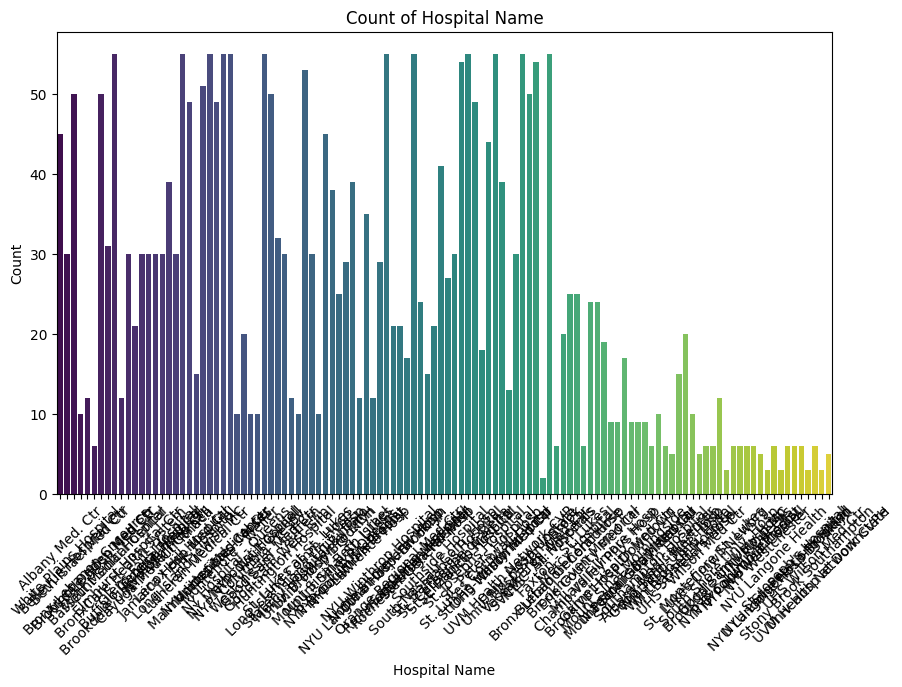

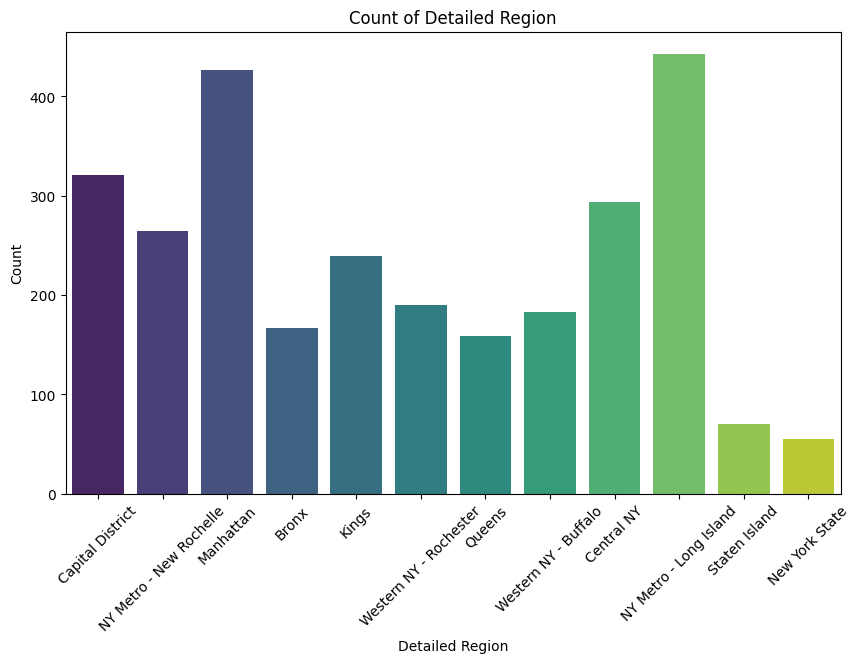

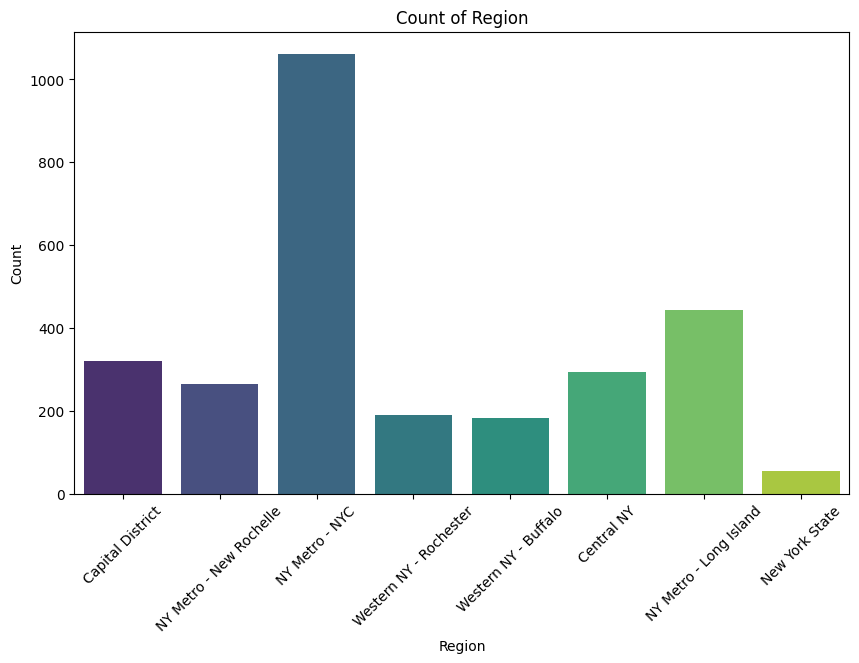

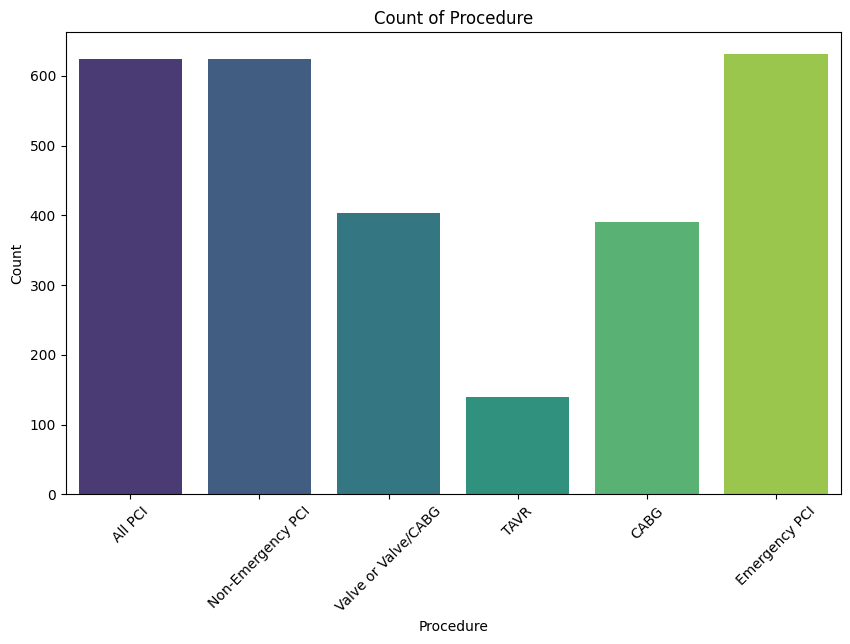

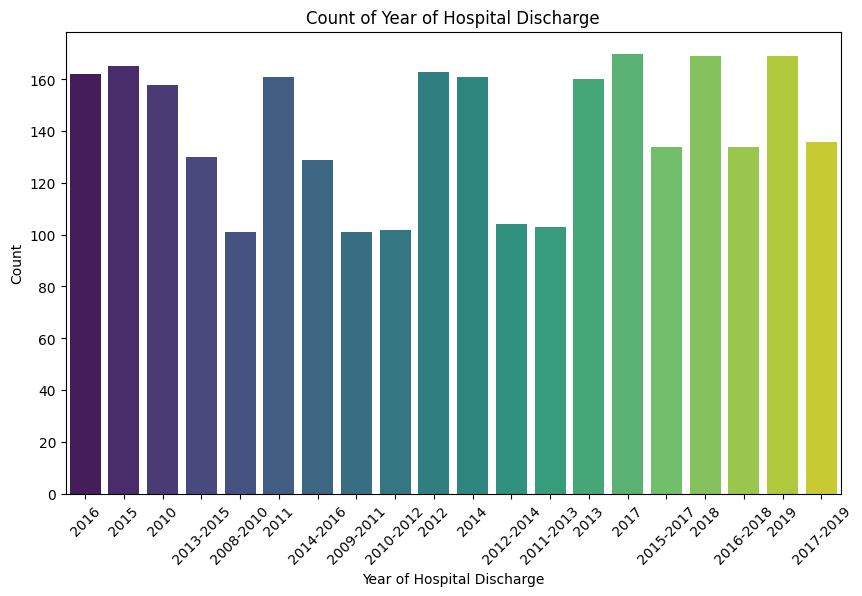

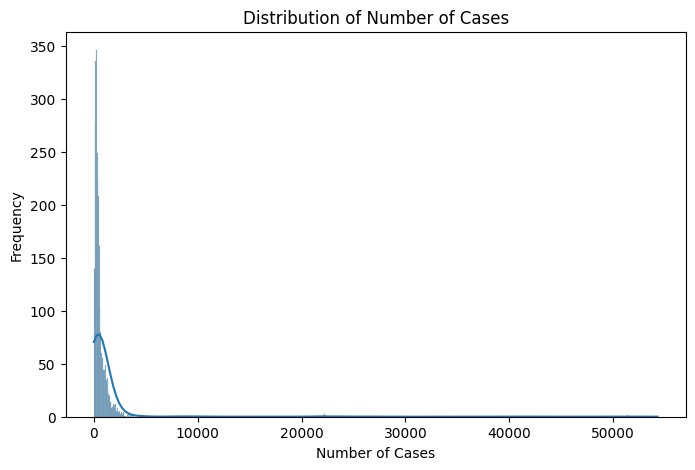

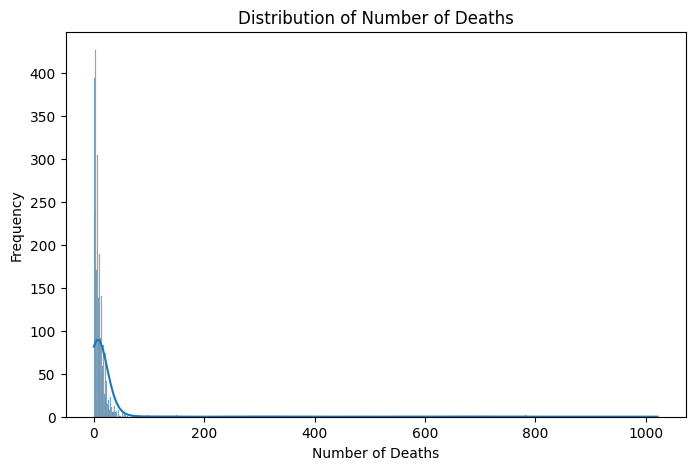

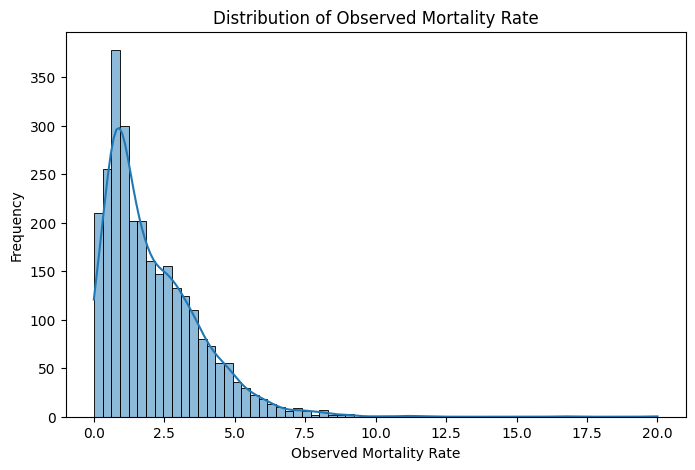

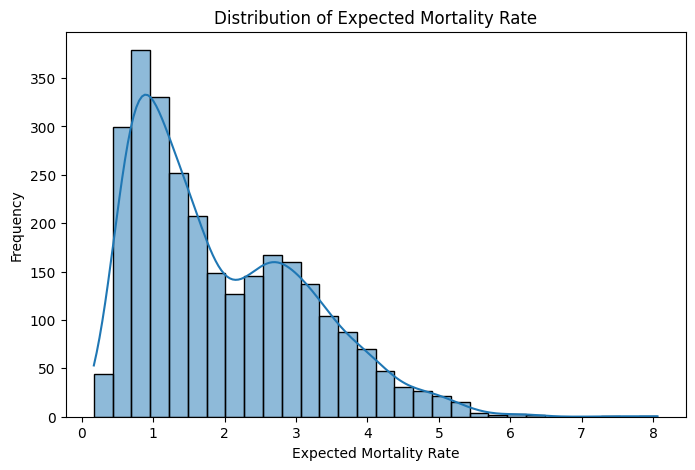

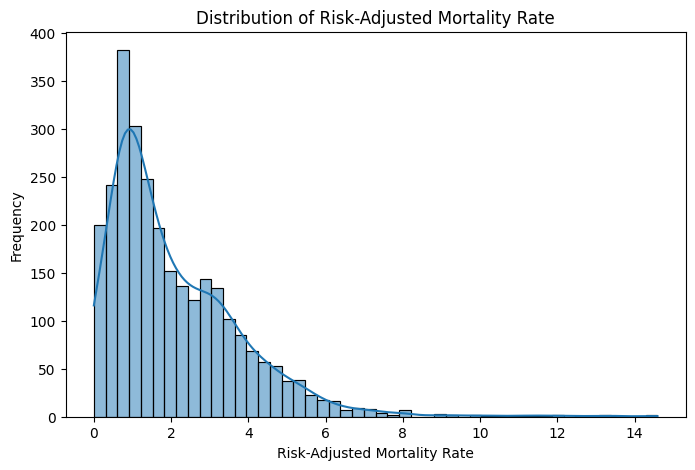

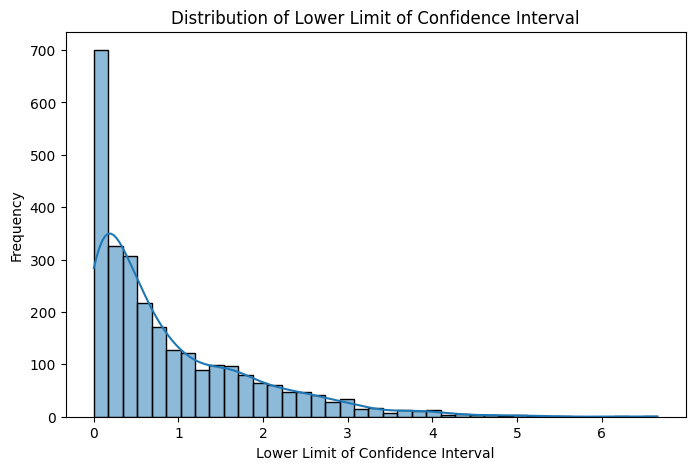

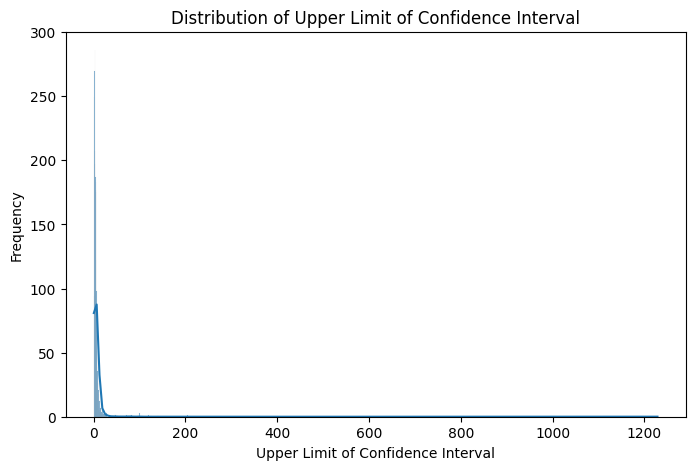

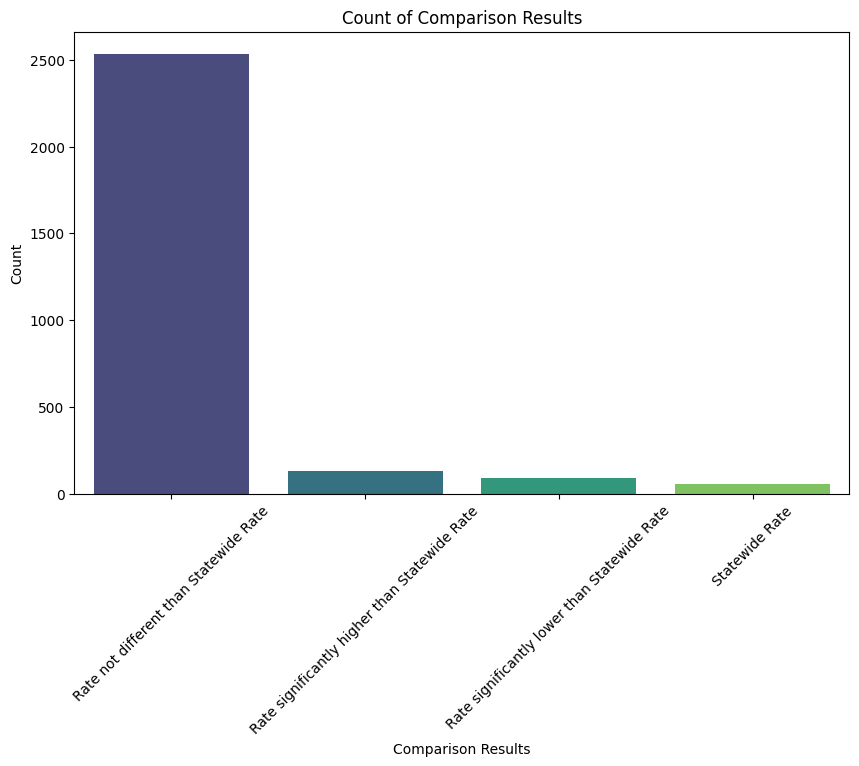

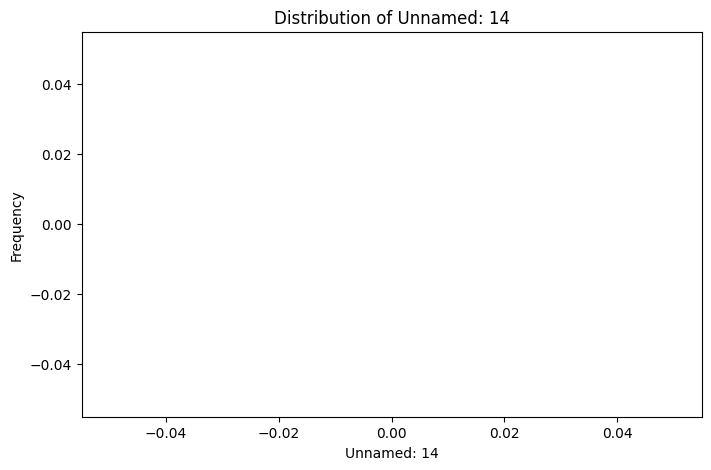

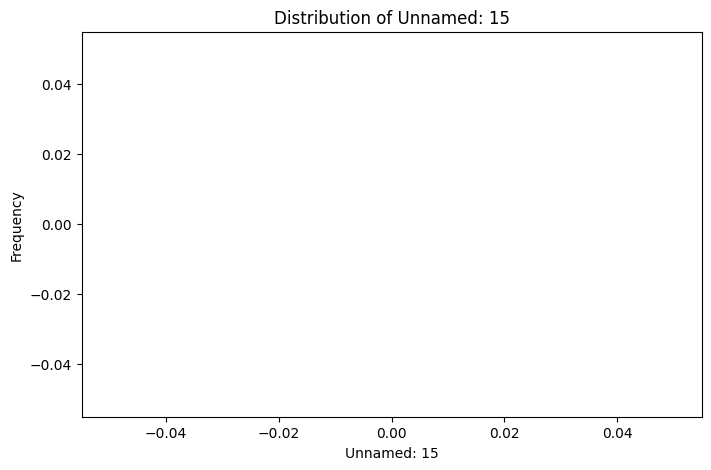

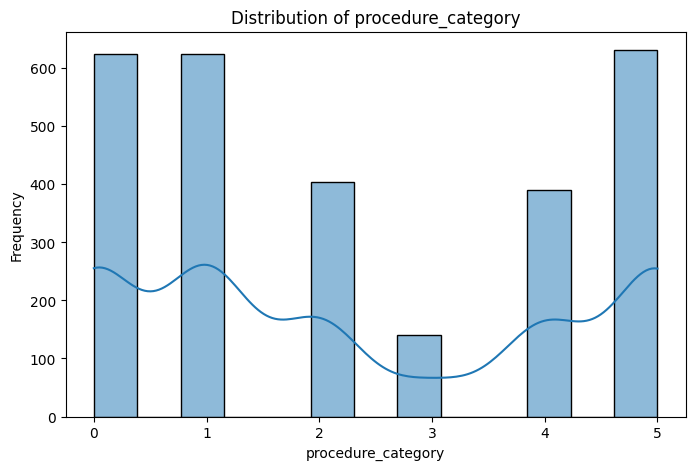

Tabular Report for Continuous Features:
       Facility ID  Number of Cases  Number of Deaths  \
count      2812.00          2812.00           2812.00   
mean        897.57          1080.07             18.60   
std         602.38          4359.57             74.35   
min           0.00             1.00              0.00   
25%         456.50           202.00              3.00   
50%         885.00           375.00              7.00   
75%        1438.00           702.25             13.00   
max        3058.00         54276.00           1021.00   

       Observed Mortality Rate  Expected Mortality Rate  \
count                  2812.00                  2812.00   
mean                      2.07                     1.95   
std                       1.70                     1.20   
min                       0.00                     0.17   
25%                       0.81                     0.95   
50%                       1.60                     1.61   
75%                       2.99   

In [102]:
# Setting options to avoid truncation when displaying a dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Tabular report for continuous features
continuous_report = df.describe()

# Tabular report for categorical features
categorical_report = df.describe(include='O')

# Data visualizations of values in each feature
for column in df.columns:
    # For continuous features
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    # For categorical features
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Displaying tabular reports
print("Tabular Report for Continuous Features:")
print(continuous_report)

print("\nTabular Report for Categorical Features:")
print(categorical_report)


**Analyzing Data Summarization and Visualization**

**Data Summarization**

1. The code is set up to display data in its entirety ensuring that all rows and columns are visible. Next it generates reports for both continuous and categorical features using the describe() function.

2. For features it calculates and presents statistics like count mean standard deviation, minimum value, 25th percentile, median (50th percentile) 75th percentile and maximum value.

3. Regarding features it provides information on unique counts, top occurrences and frequencies.

**Data Visualization**

1. Following the creation of reports the code then moves on to visually represent the data by utilizing histograms for continuous features and count plots for categorical features.

2. Histograms present the distribution of values for features by showing how data is distributed across different ranges.

3. Count plots illustrate the frequency of each category for features to shed light on how these variables are distributed within the dataset.

**Interpretation**

**Continuous Features:** By examining the tabular report details such as values and percentiles for attributes like 'Number of Cases', 'Number of Deaths', 'Observed Mortality Rate' etc. we can gain insights, into both central tendencies and spread of numerical data. When looking at features the tabular report gives details on unique categories the most common category and how often it appears. This helps us see how different categories are spread out within the variables.

Data visualization histograms show us the distribution of features pointing out patterns like skewness and central tendency. Count plots for features display how often each category appears, helping us spot dominant categories and understand their distribution in different groups.

**Key Points**

The data seems evenly spread out across categories and ranges for both continuous and categorical features.
Understanding how features are distributed and summarized is vital, for data analysis, modeling and decision making processes.

Count of missing values:
 Facility ID                              0
Hospital Name                            0
Detailed Region                          0
Region                                   0
Procedure                                0
Year of Hospital Discharge               0
Number of Cases                          0
Number of Deaths                         0
Observed Mortality Rate                  0
Expected Mortality Rate                  0
Risk-Adjusted Mortality Rate             0
Lower Limit of Confidence Interval      55
Upper Limit of Confidence Interval      55
Comparison Results                       0
Unnamed: 14                           2812
Unnamed: 15                           2812
procedure_category                       0
dtype: int64

Count of not null values for each column:
 {'Facility ID': 2812, 'Hospital Name': 2812, 'Detailed Region': 2812, 'Region': 2812, 'Procedure': 2812, 'Year of Hospital Discharge': 2812, 'Number of Cases': 2812, 'Number of Deaths': 

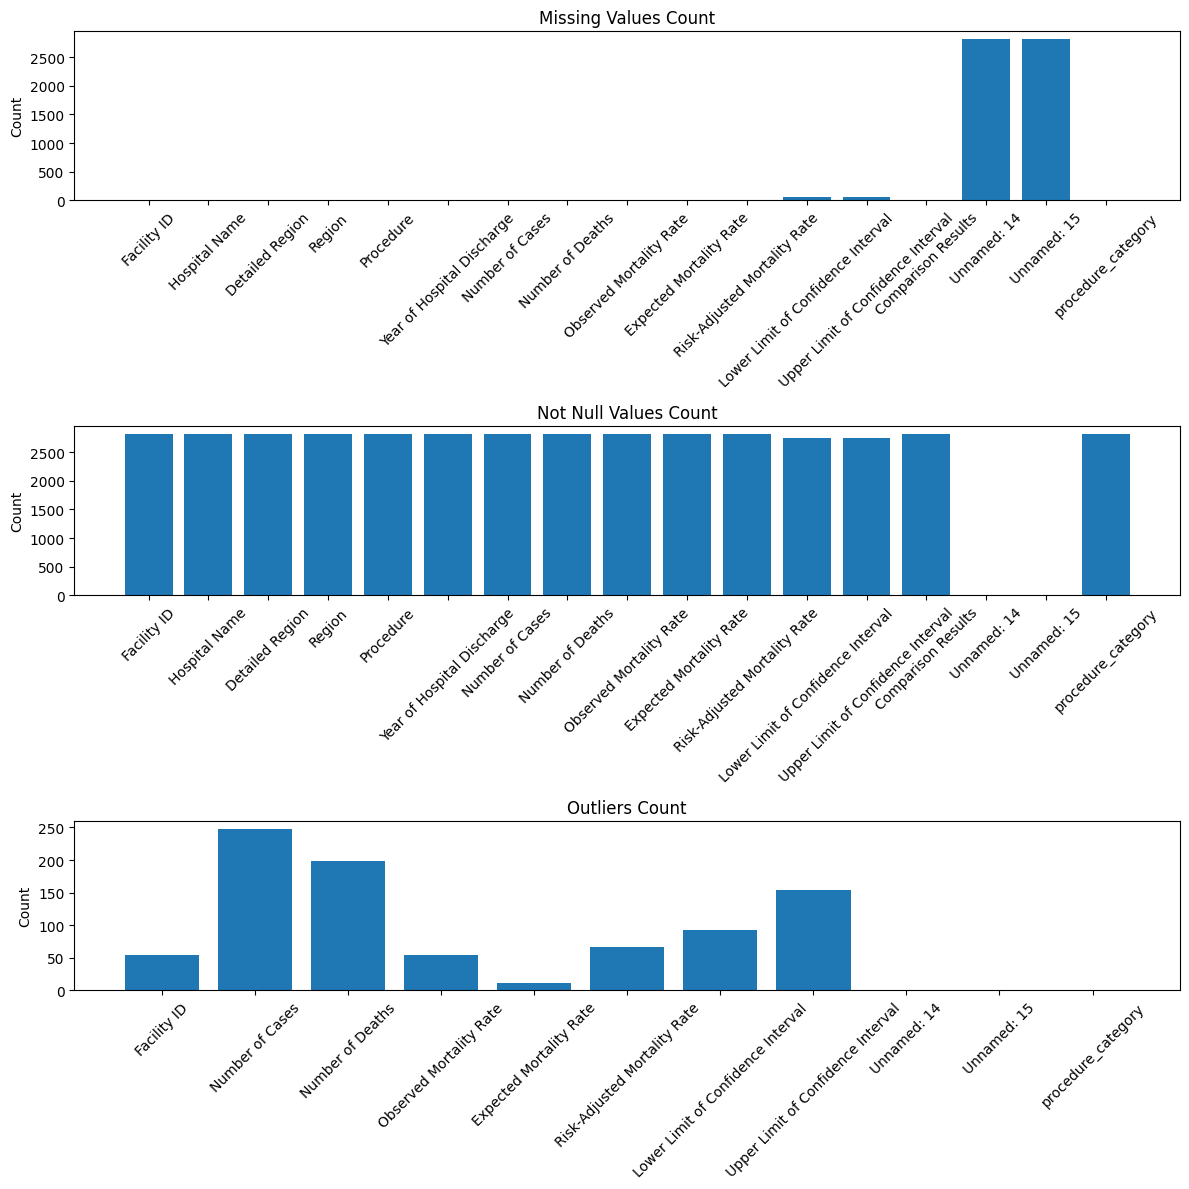

In [103]:
# Counting missing values
missing_values = df.isnull()
print("Count of missing values:\n", missing_values.sum())

# Count of not null values for each column
not_null_values = {col: len(df[col].dropna()) for col in df.columns}
print("\nCount of not null values for each column:\n", not_null_values)

# Identifying outliers
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
outliers = {}
lower_bound = {}
upper_bound = {}

for col in numeric_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound[col] = q1 - 1.5 * iqr
    upper_bound[col] = q3 + 1.5 * iqr
    outliers[col] = df[col][(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]

print("\nCount of outliers for each numeric column:\n", {col: len(values) for col, values in outliers.items()})

# Detecting duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nCount of duplicate rows:", len(duplicate_rows))

# Inconsistent data formats
inconsistent_formats = df.applymap(lambda x: isinstance(x, str))
print("\nCount of inconsistent data formats:\n", inconsistent_formats.sum().sum())

# Incomplete or inconsistent data entries
incomplete_data_entries = df[df.isnull().any(axis=1)]
print("\nCount of incomplete data entries:", len(incomplete_data_entries))


# Plotting the counts
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot missing values count
axes[0].bar(missing_values.sum().index, missing_values.sum().values)
axes[0].set_title('Missing Values Count')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot not null values count
axes[1].bar(not_null_values.keys(), not_null_values.values())
axes[1].set_title('Not Null Values Count')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plot outliers count
axes[2].bar(outliers.keys(), [len(values) for values in outliers.values()])
axes[2].set_title('Outliers Count')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Data Cleaning Process**

In [104]:
# 1. Imputation: Missing Values
# Numeric columns: Impute with the mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Categorical columns: Impute with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Duplicate Rows: dropping
df.drop_duplicates(inplace=True)

# 3. Inconsistent Data Formats: Standardize data formats
for col in categorical_cols:
    df[col] = df[col].str.strip()

# Removing the fully empty columns only if they exist
columns_to_drop = ['Unnamed: 14', 'Unnamed: 15']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)


# Year Extraction
def extract_single_year(year):
    # To check if it's a range
    if isinstance(year, str) and '-' in year:
        # Extracting the first year from the range
        return year.split('-')[0]  
    else:
        return year

# Applying the function to the 'Year of Hospital Discharge' column
df['Year of Hospital Discharge'] = df['Year of Hospital Discharge'].apply(extract_year)

# Handling possible NaT values after conversion
df['Year of Hospital Discharge'].fillna(df['Year of Hospital Discharge'].mode()[0], inplace=True)

# Saving the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)


Missing values in each column:
 Facility ID                           0
Hospital Name                         0
Detailed Region                       0
Region                                0
Procedure                             0
Year of Hospital Discharge            0
Number of Cases                       0
Number of Deaths                      0
Observed Mortality Rate               0
Expected Mortality Rate               0
Risk-Adjusted Mortality Rate          0
Lower Limit of Confidence Interval    0
Upper Limit of Confidence Interval    0
Comparison Results                    0
procedure_category                    0
dtype: int64

Data types:
 Facility ID                             int64
Hospital Name                          object
Detailed Region                        object
Region                                 object
Procedure                              object
Year of Hospital Discharge            float64
Number of Cases                         int64
Number of Deaths   

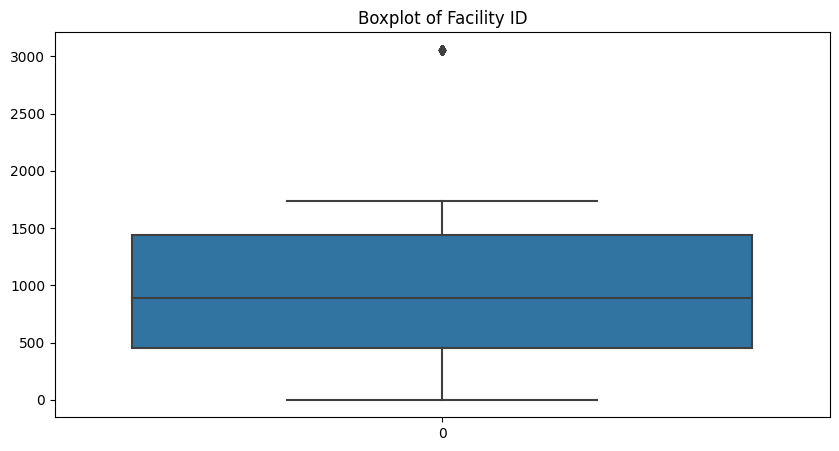

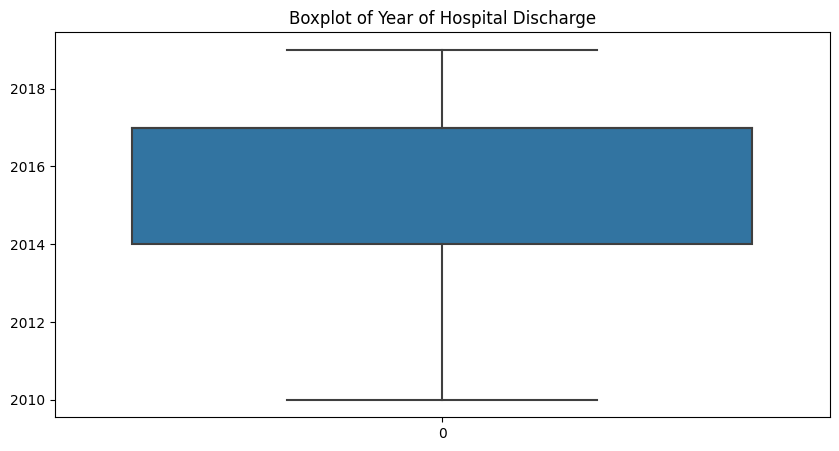

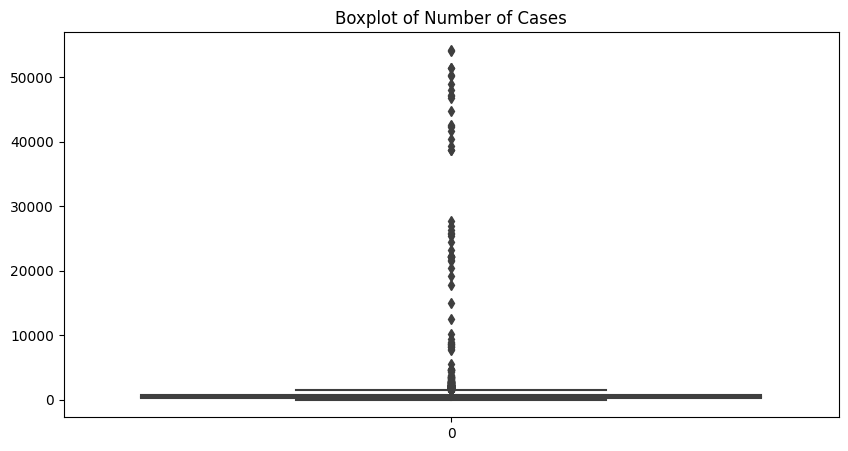

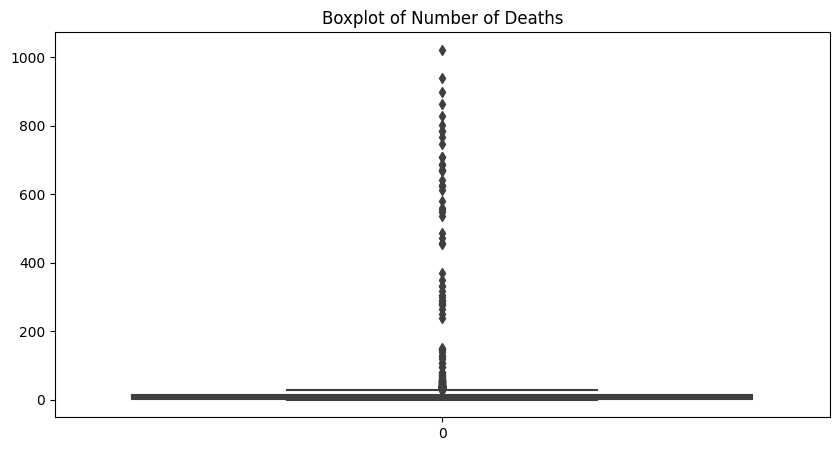

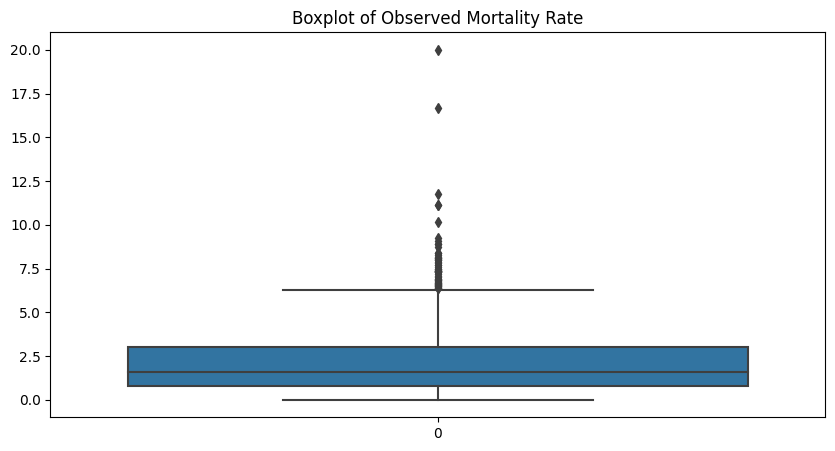

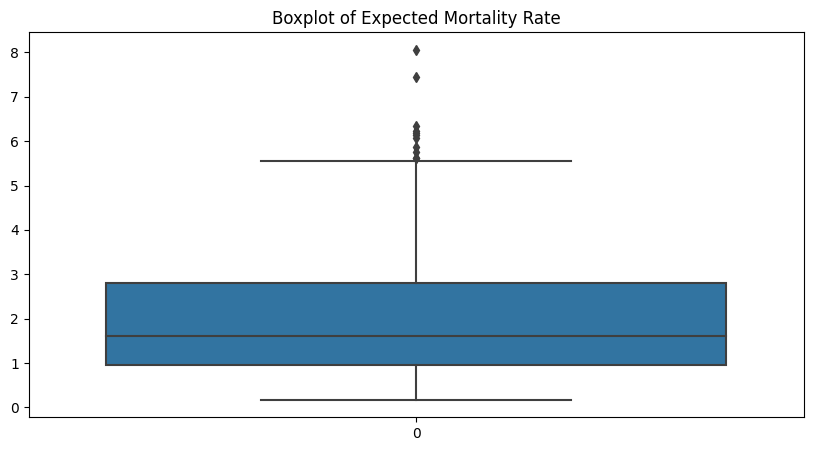

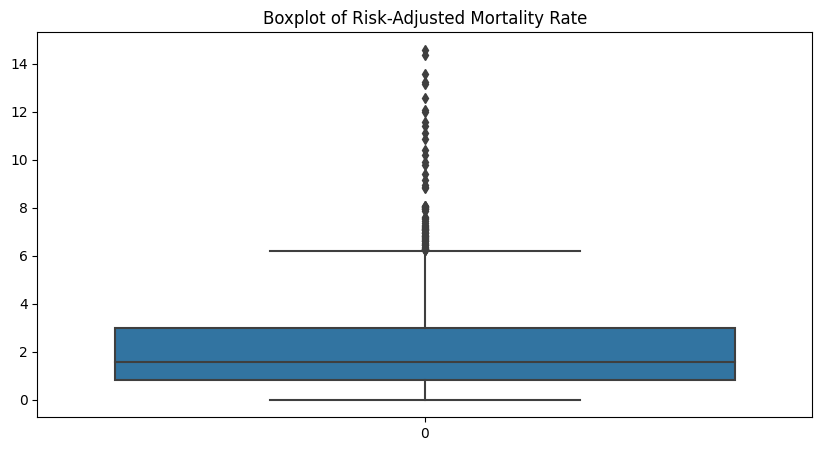

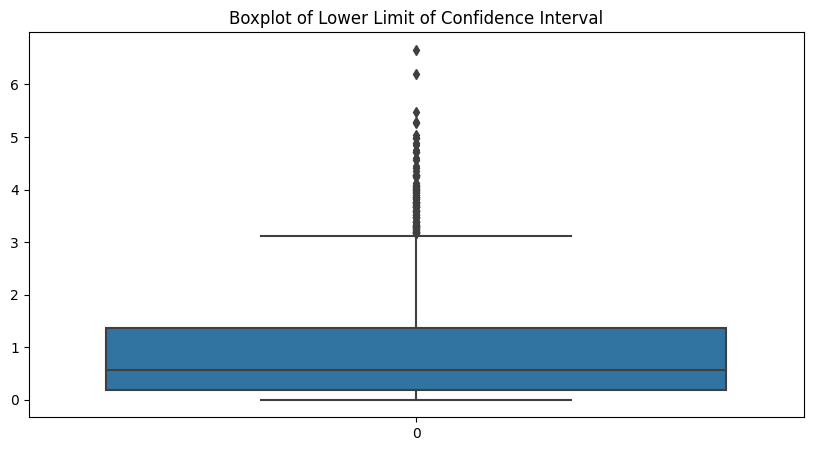

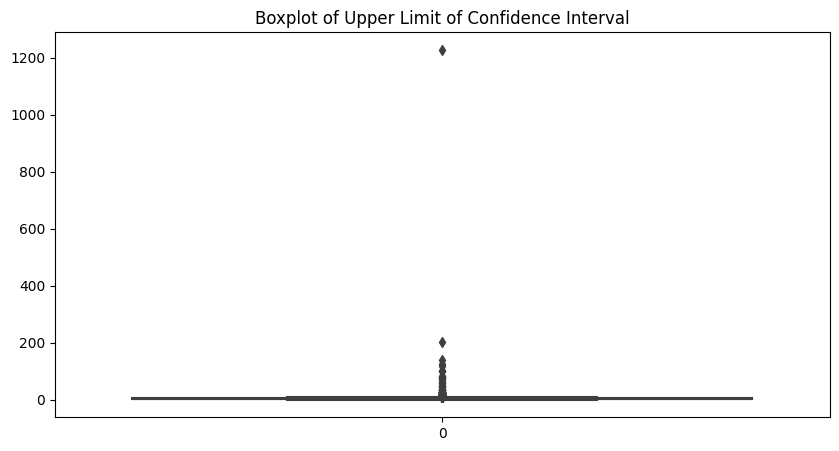

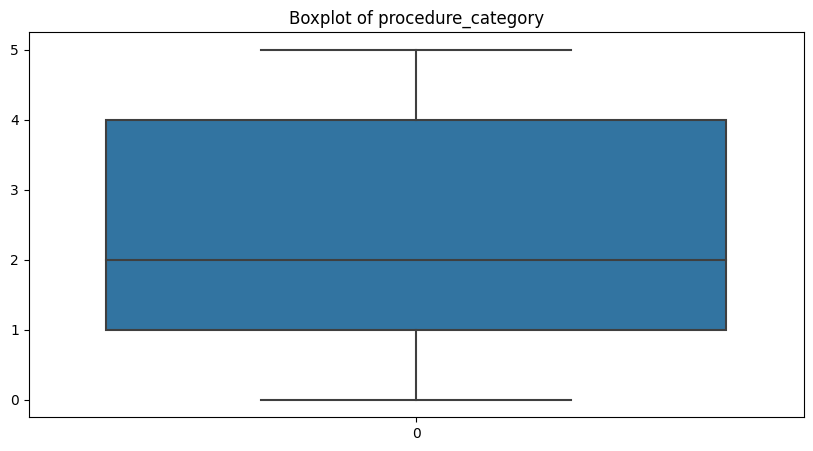

In [105]:
# Loading the cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

# Re-checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Inspecting data types
print("\nData types:\n", df.dtypes)

# Re-checking for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Outlier detection with boxplots for numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**Inconsistent Data Formats:**

1. The program detects inconsistencies in data formats by examining whether each value in the dataset is a string.

2. It matches up the occurrences of mismatched data formats across all columns, presents the total count, incomplete data entries.

3. It spots data entries by searching for rows with at least one missing value.

4. The number of entries is shown, revealing a total of 2812 such instances.

**Data Quality Visualization:**

**Facility Identification:** In this box plot there is one data point that stands out significantly from the rest. Since Facility ID is likely an identifier rather than a numerical value this outlier could simply be the highest assigned ID and may not impact numerical analysis.

**Year of Hospital Discharge:** The data appears to be concentrated around years with no clear outliers. No action is necessary regarding outliers in this case.

**Number of Cases & Number of Deaths:** There are data points above the upper whisker indicating that certain facilities have notably higher numbers of cases and deaths. This might be typical for hospitals or those specializing in cardiac care. Considering these points could offer insights for our analysis it's advisable not to remove or modify them.

**Observed Mortality Rate, Expected Mortality Rate & Risk Adjusted Mortality Rate:** The presence of outliers, in these rates could signal instances of high or low mortality rates. These outliers may hold significance for our analysis as they could represent cases or important anomalies. It's recommended to retain these outliers in the dataset for an examination.

**The lower boundary of the confidence interval and the upper boundary of the confidence interval:**
Certain values fall beyond the range but similar to mortality rates these extreme cases might hold significance in comprehending the diversity, in your data. It is advisable to retain them as they could provide insights.





In [106]:
# Summary statistics for numeric data
summary_stats = df.describe()
print(summary_stats)


       Facility ID  Year of Hospital Discharge  Number of Cases  \
count      2812.00                     2812.00          2812.00   
mean        897.57                     2015.58          1080.07   
std         602.38                        2.50          4359.57   
min           0.00                     2010.00             1.00   
25%         456.50                     2014.00           202.00   
50%         885.00                     2017.00           375.00   
75%        1438.00                     2017.00           702.25   
max        3058.00                     2019.00         54276.00   

       Number of Deaths  Observed Mortality Rate  Expected Mortality Rate  \
count           2812.00                  2812.00                  2812.00   
mean              18.60                     2.07                     1.95   
std               74.35                     1.70                     1.20   
min                0.00                     0.00                     0.17   
25%        

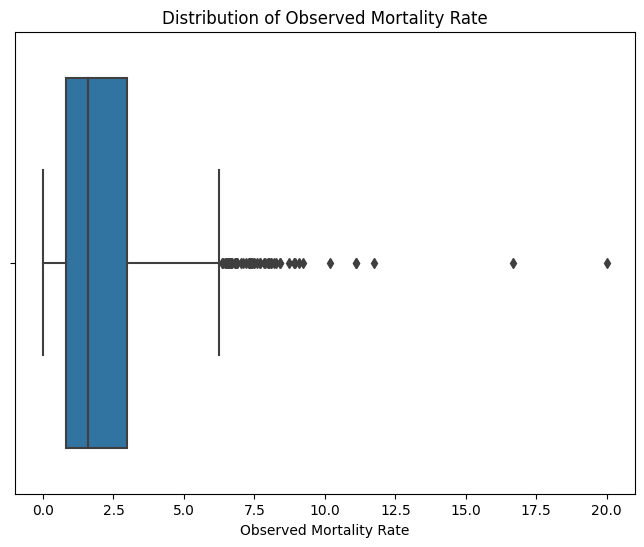

Outliers in Observed Mortality Rate:
                Hospital Name  Observed Mortality Rate
142      Mount Sinai Hospital                     7.30
159     Bellevue Hospital Ctr                     8.08
161    Bronx-Lebanon-Cncourse                     6.80
162    Brookdale Hosp Med Ctr                     8.02
194       SVCMC- St. Vincents                    11.76
215     White Plains Hospital                     7.32
220       Beth Israel Med Ctr                     7.58
229       Lenox Hill Hospital                     7.35
236       Montefiore - Weiler                     6.59
245       SVCMC- St. Vincents                     7.84
387       Univ. Hosp-Brooklyn                    16.67
393    NYP-Brooklyn Methodist                     7.50
419       Univ. Hosp-Brooklyn                    11.11
435        Faxton - St. Lukes                     7.89
479    NYP-Brooklyn Methodist                     6.63
489       Beth Israel Med Ctr                     6.53
502       Montefiore - Weile

In [107]:
# Post Data Cleaning we are trying to understand outliers in our data
# Visualizing the distribution of observed mortality rate
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Observed Mortality Rate'])
plt.title('Distribution of Observed Mortality Rate')
plt.xlabel('Observed Mortality Rate')
plt.show()

# Calculating the interquartile range (IQR)
Q1 = df['Observed Mortality Rate'].quantile(0.25)
Q3 = df['Observed Mortality Rate'].quantile(0.75)
IQR = Q3 - Q1

# Defining the threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Observed Mortality Rate'] < lower_bound) | (df['Observed Mortality Rate'] > upper_bound)]

# Displaying the outliers
print("Outliers in Observed Mortality Rate:")
print(outliers[['Hospital Name', 'Observed Mortality Rate']])



It seems like there are several hospitals with outlier observed mortality rates. These outlier values may indicate potential areas of concern or excellence in hospital performance. 

**Our understanding for outliers**

Outliers can sometimes provide valuable insights into our data, and they should not be removed without proper justification or understanding of their underlying reasons. Since we are missing dataset that can describe the hospital demographics in detail like hospital size, number of doctors, cardiac specialist hospital, patient demographic etc. we cannot perform further outlier analysis. Theefore, we will keep the outliers in our model as they can prove to be effecient.

**Objective:**

The aim is to find the successful medical procedures based on a hospitals track record and various factors like location, efficiency metrics of procedures (such as mortality rates) and the number of cases handled.

**Target Variable: Observed Mortality Rate**

**Key Factors**

**Mortality Rate Observed:** This reflects the mortality rate seen in patients undergoing a specific medical procedure. A observed mortality rate might suggest a more favorable outcome for the procedure.
 
**Case Volume:** The quantity of cases for each procedure can offer insights into its popularity and how experienced the hospital is with it.
 
**Number of Deaths:** Knowing the number of deaths linked to each procedure is essential for evaluating its safety and efficacy.
 
**Location:** Differences in regions could impact healthcare quality, resources and patient characteristics influencing results.


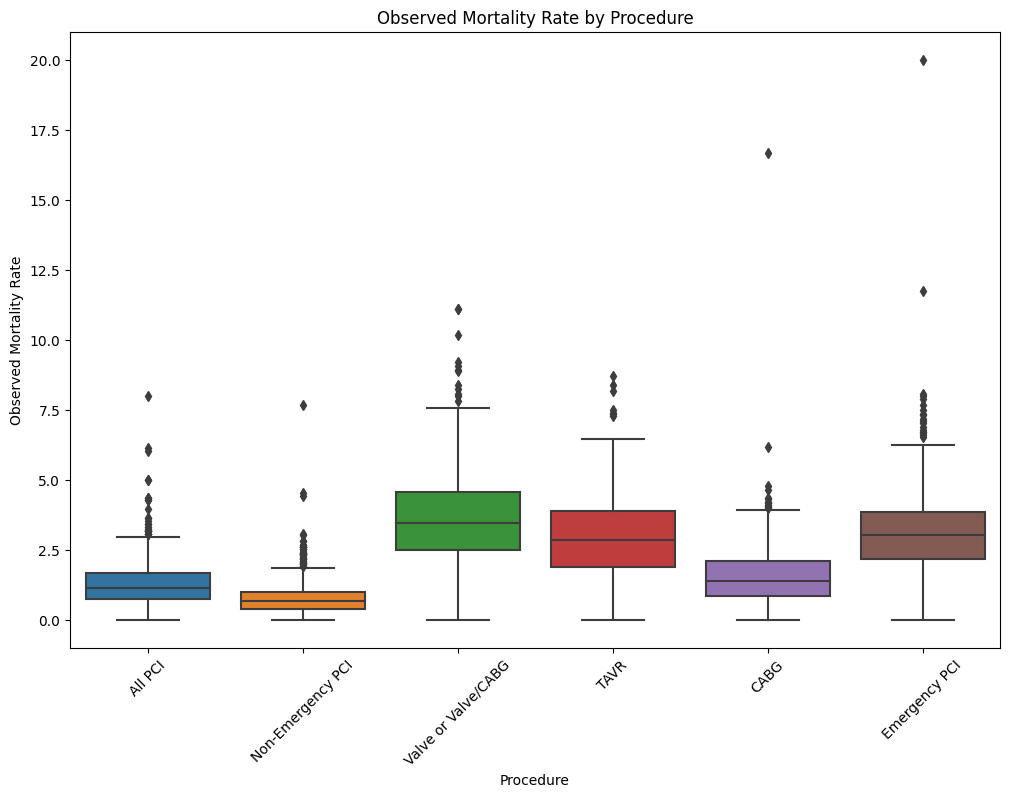

In [108]:
# Box plot for observed mortality rate by procedure
plt.figure(figsize=(12, 8))
sns.boxplot(x='Procedure', y='Observed Mortality Rate', data=df)
plt.xticks(rotation=45)
plt.title('Observed Mortality Rate by Procedure')
plt.xlabel('Procedure')
plt.ylabel('Observed Mortality Rate')
plt.show()


Note: we are considering outliers to be in-favour of our analysis (assumption).

**X-Axis (Procedure):** 
The x-axis represents different medical procedures. The categories include:
1. All PCI: Refers to all percutaneous coronary intervention procedures.
2. Non-emergency PCI: Specifically for non-emergency cases.
3. Valve w/o Valve+CABG: Procedures related to heart valves without concurrent coronary artery bypass graft (CABG).
4. TAVR: Transcatheter aortic valve replacement.
5. CABG: Coronary artery bypass graft surgery.
6. Emergency PCI: Emergency percutaneous coronary intervention.

**Y-Axis (Observed Mortality Rate):** 
The y-axis shows the observed mortality rate for each procedure. The values range from 0% to 20%.

**Box Plots:**
1. Each category on the x-axis has a corresponding box plot.
2. The box represents the interquartile range (IQR), with the median mortality rate indicated by the horizontal line inside the box.
3. Whiskers extend to the minimum and maximum values within 1.5 times the IQR.

**Interpretation:**
**Variability in Mortality Rates:**
1. The spread of the boxes (interquartile range, IQR) for each procedure indicates the variability in observed mortality rates.
2. Procedures with wider IQRs have more variability in outcomes, while narrower IQRs suggest more consistent mortality rates.

**Median Mortality Rate:**
1. The horizontal line inside each box represents the median observed mortality rate for that procedure.
2. The median is the middle value when all mortality rates are sorted in ascending order.
3. It provides a central tendency measure.

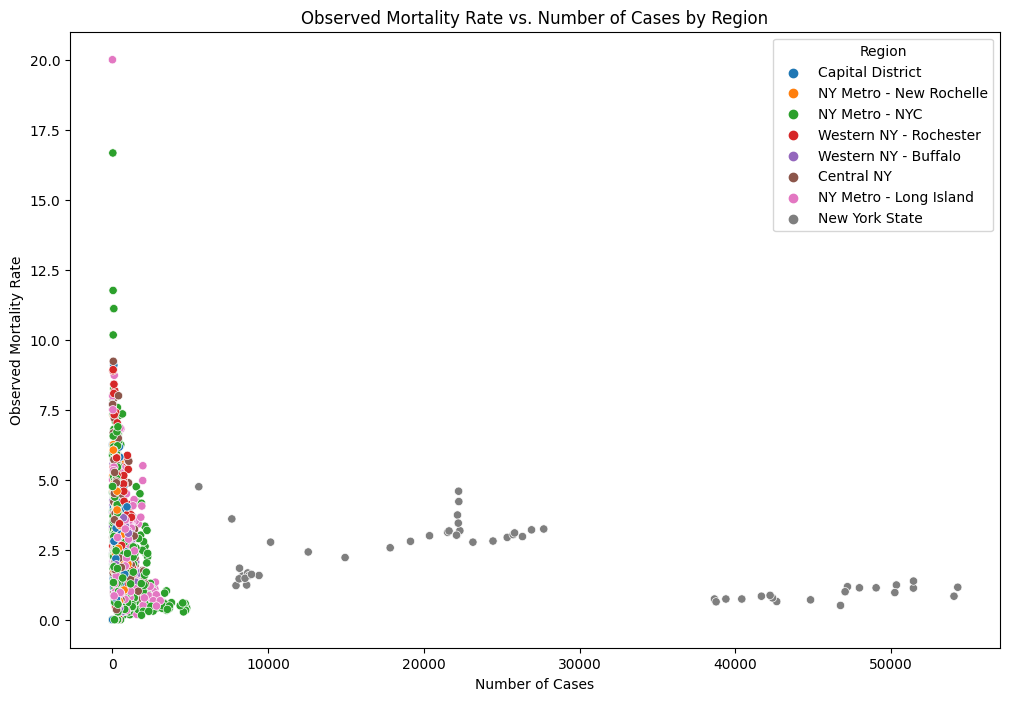

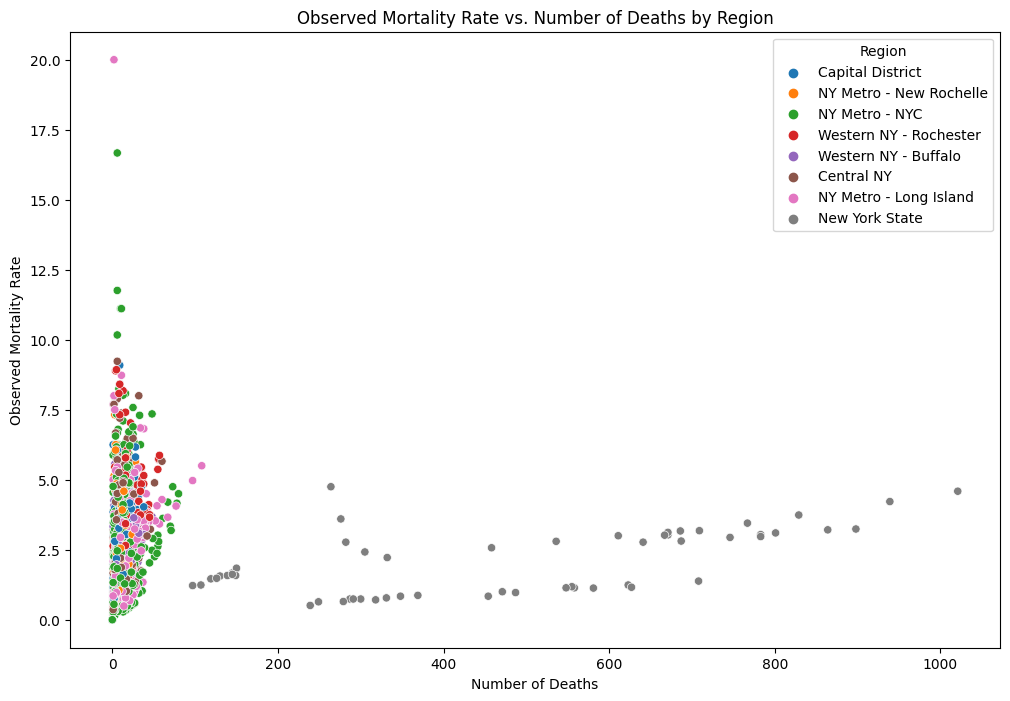

In [109]:
# Scatter plot of observed mortality rate vs. number of cases colored by region
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Number of Cases', y='Observed Mortality Rate', hue='Region', data=df)
plt.title('Observed Mortality Rate vs. Number of Cases by Region')
plt.xlabel('Number of Cases')
plt.ylabel('Observed Mortality Rate')
plt.legend(title='Region', loc='upper right')
plt.show()

# Scatter plot of observed mortality rate vs. number of deaths colored by region
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Number of Deaths', y='Observed Mortality Rate', hue='Region', data=df)
plt.title('Observed Mortality Rate vs. Number of Deaths by Region')
plt.xlabel('Number of Deaths')
plt.ylabel('Observed Mortality Rate')
plt.legend(title='Region', loc='upper right')
plt.show()


**Plot 1**
**X-Axis (Number of Cases):**
1. The x-axis represents the number of cases for each observation.
2. The range of values spans from 0 to approximately over 50,000 cases.
3. Each data point corresponds to a specific medical procedure or region.

**Y-Axis (Observed Mortality Rate):**
1. The y-axis shows the observed mortality rate for each observation.
2. The values range from 0% to 20%.
3. Higher values indicate a higher mortality rate.

**Interpretation:**
Most data points are clustered at the lower end of both axes. This suggests that the majority of cases have relatively low mortality rates.

**Plot 2**
**X-Axis (Number of Deaths):**
1. The x-axis represents the total number of deaths for each observation.
2. The range of values spans from 0 to approximately 1000 deaths.
3. Each data point corresponds to a specific medical procedure or region.

**Y-Axis (Observed Mortality Rate):**
1. The y-axis shows the observed mortality rate for each observation.
2. The values range from 0% to 20%.
3. Higher values indicate a higher mortality rate.

**Interpretation:**
Most data points are clustered between 0 and 200 deaths, with observed mortality rates ranging from approximately 2.5% to 10%.

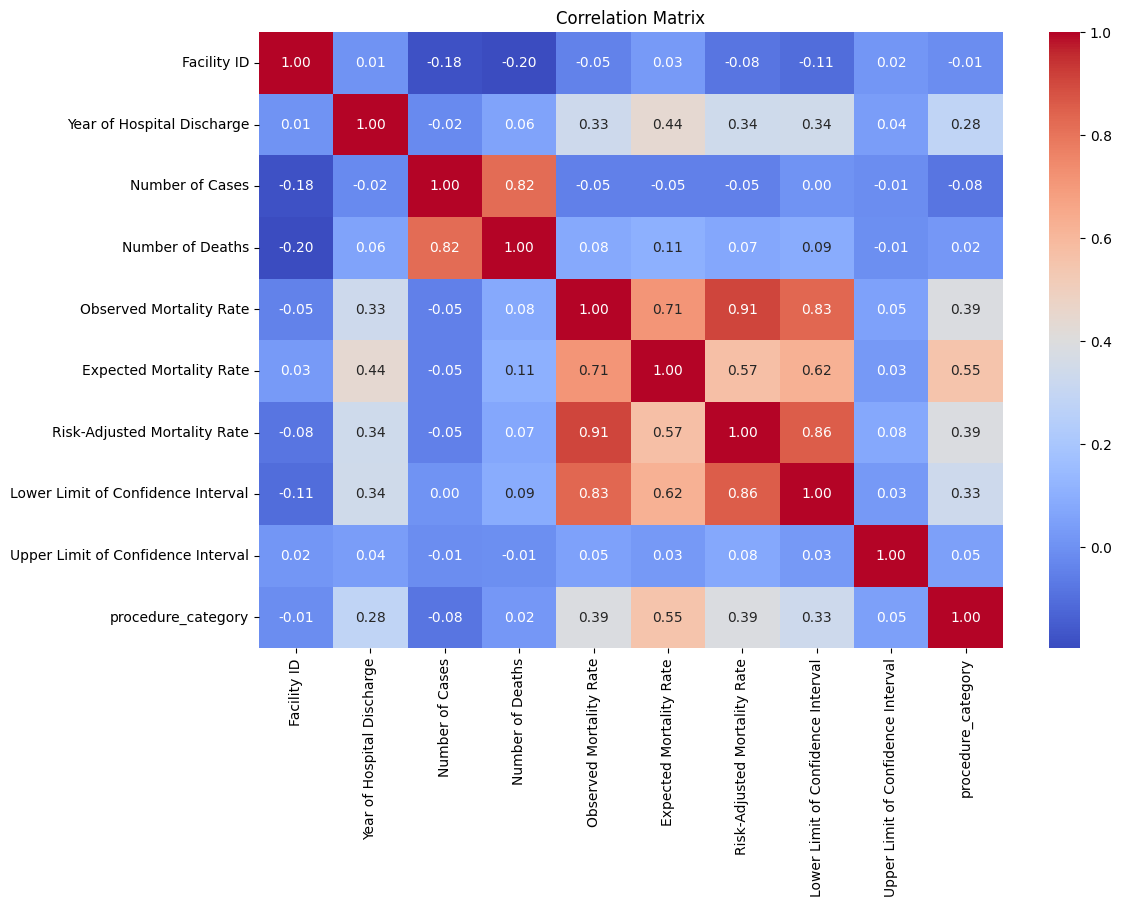

In [110]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The correlation matrix displays how variables in the dataset are related to each other. Here's a brief explanation of the correlation coefficients.

**Facility ID vs. Variables:** There seems to be a slight negative correlation between Facility ID and certain variables suggesting that higher Facility IDs might be linked to slightly lower values in those variables.

**Year of Hospital Discharge vs. Other Variables:** The correlation with other variables is generally weak except for a moderate positive correlation with some factors related to mortality.

**Number of Cases vs. Variables:** There are strong positive correlations between the number of cases and mortality related factors indicating that higher case numbers could be linked to higher mortality rates.

**Number of Deaths vs. Variables:** As expected there are strong positive correlations between the number of deaths and mortality related factors.

**Observed Mortality Rate vs. Variables:** Strong positive correlations exist between the mortality rate and other mortality related factors showing consistency in measuring mortality rates.

**Expected Mortality Rate vs. Variables:** Positive correlations are seen between the expected mortality rate and other mortality related factors.

**Risk Adjusted Mortality Rate, vs. Variables:** Strong positive correlations exist between the risk adjusted mortality rate and other mortality related factors.

Positive relationships are found between the limit of confidence interval and factors related to mortality. Similarly there are connections between the upper limit of confidence interval and variables associated with mortality. In addition there are positive links between the procedure category and certain mortality related factors suggesting potential variations in mortality rates, among different procedure categories.

**Model 1: Linear Regression, Random Forest and Gradient Boosting Model**

In [111]:
# Feature Selection based on correlation
correlation_matrix = df.corr()
# Considering only features with a moderate amount of correlation with 'Observed Mortality Rate'
selected_features = correlation_matrix['Observed Mortality Rate'][(correlation_matrix['Observed Mortality Rate'] > 0.3) & (correlation_matrix['Observed Mortality Rate'] < 0.8)].index.tolist()

# Ensuring the target variable 'Observed Mortality Rate' is present in the dataset
if 'Observed Mortality Rate' in selected_features:
    selected_features.remove('Observed Mortality Rate')  # Removing the target variable from features list if present as per correlation matrix


## Model: Linear Regression and Random Forest
    
# Preparing Data for Model
X = df[selected_features]  # Features
y = df['Observed Mortality Rate']  # Target

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing models
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training models
model_lr.fit(X_train_scaled, y_train)
model_rf.fit(X_train_scaled, y_train)

# Performing cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = cross_val_score(model_rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Cross-validation results
print(f"Linear Regression CV MSE: {-cv_scores_lr.mean()}, STD: {cv_scores_lr.std()}")
print(f"Random Forest CV MSE: {-cv_scores_rf.mean()}, STD: {cv_scores_rf.std()}")

# Predictions and evaluation based on the test set
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Test set results
print(f"Linear Regression Test MSE: {mse_lr}, R2: {r2_lr}")
print(f"Random Forest Test MSE: {mse_rf}, R2: {r2_rf}")

# Print the features used in model training
print("Features used in model training:", selected_features)

Linear Regression CV MSE: 1.363622401503116, STD: 0.15197336259148633
Random Forest CV MSE: 1.7405585172217368, STD: 0.1524472099027905
Linear Regression Test MSE: 1.6281602371642618, R2: 0.5143328517798206
Random Forest Test MSE: 2.0219749255198325, R2: 0.39686108686681176
Features used in model training: ['Year of Hospital Discharge', 'Expected Mortality Rate', 'procedure_category']


**Why Specific Models Were Chosen:**

**Linear Regression (LR):**

1. **Interpretation:** LR assigns coefficients to each feature making it simple to understand how each feature impacts the predicted outcome.
2. **Linearity Assumption:** LR assumes a connection between the features and the target variable, which is often valid in real world situations.
3. **Simplicity** LR is efficient computationally and straightforward to implement making it an ideal starting point for regression tasks.
4. **Baseline Comparison:** LR acts as a model for comparing more complex models.

**Random Forest Regressor (RF):**

1. **Handling Non linearity:** RF can capture non linear relationships between features and the target variable that may not be captured by LR.
2. **Overfitting Resilience:** RF is less susceptible to overfitting than decision trees since it averages predictions from multiple trees.
3. **Feature Significance:** RF offers insights into feature importance aiding in identifying predictors of the target variable.
4. **Model Performance:** RF generally performs across various datasets in practical settings making it a popular choice, for regression tasks.

The trained models are utilized to predict outcomes on test data.

Additionally, both models are evaluated using cross-validation, a technique to assess how well the models generalize to unseen data:

**Cross-Validation:** Cross-validation involves splitting the training data into multiple subsets, training the model on different combinations of these subsets, and evaluating its performance on the remaining data. This process helps estimate how the model will perform on new, unseen data and provides a more reliable assessment of its predictive capabilities.

**They are assessed using two measures:**

1. **Mean Squared Error (MSE):** This calculates the average of the errors representing the average squared variance between the estimated values and the actual value.
 
2. **R squared (R²):** This is an indicator of how closely the data align with the regression line. Its also termed as the coefficient of determination or multiple determination for regression.

**What is Being Predicted by the Model?**
The model predicts the 'Observed Mortality Rate' for a procedure based on various included variables serving as features. In simply terms, given information about a procedure and its location within a hospital (along with possibly other relevant factors) the model forecasts what the mortality rate might be.

**Current Outcomes:**
The outcomes illustrate how two models performed. The **Linear Regression** model seems to exhibit better performance based on MSE and R² scores suggesting it fits our provided data better. One the flip side, the **Random Forest model** showed lower performance possibly due to overfitting or requiring adjustments, in hyperparameters.

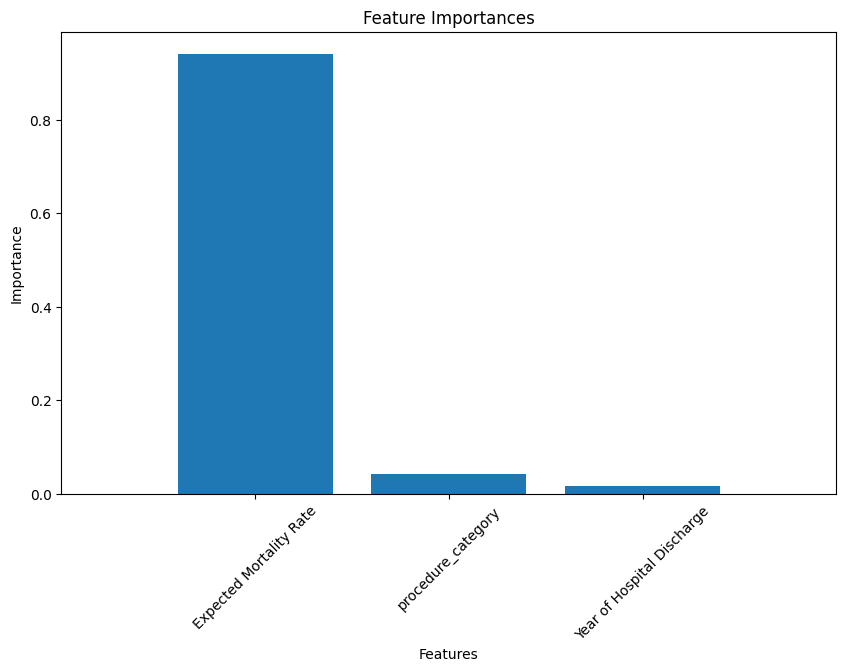

In [112]:
# This is just to see selected features and their importance
# Get feature importances from the model
importances = best_grid.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

**Hyperparameters Tuning for Random Forest Model:**

To improve the Random Forest model we can refine it through hyperparameter tuning using methods like grid search or random search. Grid search involves exploring specific parameter values to find the best ones for a model. It's an approach that check everything before setting values. On the hand, random search selects hyperparameter values randomly and is less systematic.

In this case we'll use grid search (GridSearchCV) due to its simplicity. Because the exhaustive process is not a major concern we only need to adjust a few parameters in this scenario.

In [113]:
# Parameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initializing the grid search model
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3,  # Number of folds in cross-validation
                           n_jobs=-1,  # Use all processors
                           verbose=2,  # Controls the verbosity: the higher, the more messages
                           scoring='neg_mean_squared_error')  # Negative MSE because grid search maximizes the score

# Fitting the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print(f"Best parameters: {grid_search.best_params_}")

# Initialize the best model from grid search
best_grid = grid_search.best_estimator_

# Evaluating the best model on the test set
y_pred_best_grid = best_grid.predict(X_test_scaled)
mse_best_grid = mean_squared_error(y_test, y_pred_best_grid)
r2_best_grid = r2_score(y_test, y_pred_best_grid)

print(f"Optimized Random Forest Test MSE: {mse_best_grid}, R2: {r2_best_grid}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Random Forest Test MSE: 1.7130704143788613, R2: 0.4890048265146242


**The hyperparameter tuning has identified the best parameters from the given range for the Random Forest model:**

max_depth: 10

min_samples_leaf: 4

min_samples_split: 10

n_estimators: 100

Using these parameters, the Random Forest's performance on the test set has an MSE of 1.7131 and an R² of 0.4890. 

Compared to the untuned Random Forest model's test MSE of 2.0219 and R² of 0.3969, the tuned model has a lower MSE, which is an improvement. However, the R² is higher (closer to 0.5), indicating that the tuned model explains almost half of the variability in the observed mortality rate, which is also an improvement.

**Model: Gradient Boosting Model**

In [114]:
# Initialize and train the Gradient Boosting model
model_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gbm.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred_gbm = model_gbm.predict(X_test_scaled)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f"Gradient Boosting Test MSE: {mse_gbm}, R2: {r2_gbm}")


Gradient Boosting Test MSE: 1.6753714393925643, R2: 0.500250128576728


**Why Gradient Boosting?** 

1. It often achieves levels of accuracy by creating a series of weak learners and learning from errors at previous state. Each learner focuses on correcting the errors made by the one resulting in a performance improvement.

2. One of the strengths of Gradient Boosting is its ability to capture relationships and nonlinear patterns within the data. It can create models that can identify patterns present in the dataset.

3. Compared to algorithms like decision trees, Gradient Boosting models are more resistant to overfitting especially when incorporating techniques such as controlling tree depth and using shrinkage methods.

4. A notable advantage of Gradient Boosting is its ability to determine feature importance naturally. This feature assessment can offer insights into which features play a role, in making predictions aiding in understanding the model and uncovering factors influencing observed mortality rates.


**Further Tuning of the Gradient Boosting Model**

To further tune the Gradient Boosting model, we can use GridSearchCV to experiment with a few key hyperparameters. 


In [115]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the model
gbm = GradientBoostingRegressor(random_state=42)

# Initialize the grid search model
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Best model
best_gbm = grid_search.best_estimator_

# Predictions
y_pred_gbm = best_gbm.predict(X_test_scaled)

# Evaluation
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"Optimized Gradient Boosting Test MSE: {mse_gbm}, R2: {r2_gbm}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Optimized Gradient Boosting Test MSE: 1.6581961565682204, R2: 0.5053733777746707


**The hyperparameter tuning for the Gradient Boosting model has resulted in the identification of the best parameters as follows:**

learning_rate: 0.05

max_depth: 3

n_estimators: 100

Using these optimized parameters, the Gradient Boosting model achieved a Mean Squared Error (MSE) of 1.6582 and an R-squared (R²) value of 0.5054 on the test set. 

This performance is slightly better than the previous iteration of the Gradient Boosting model and indicates that about 50.5% of the variance in the observed mortality rate can be explained by the model. It also represents a good balance between bias and variance, avoiding overfitting while maintaining a decent level of predictive accuracy.

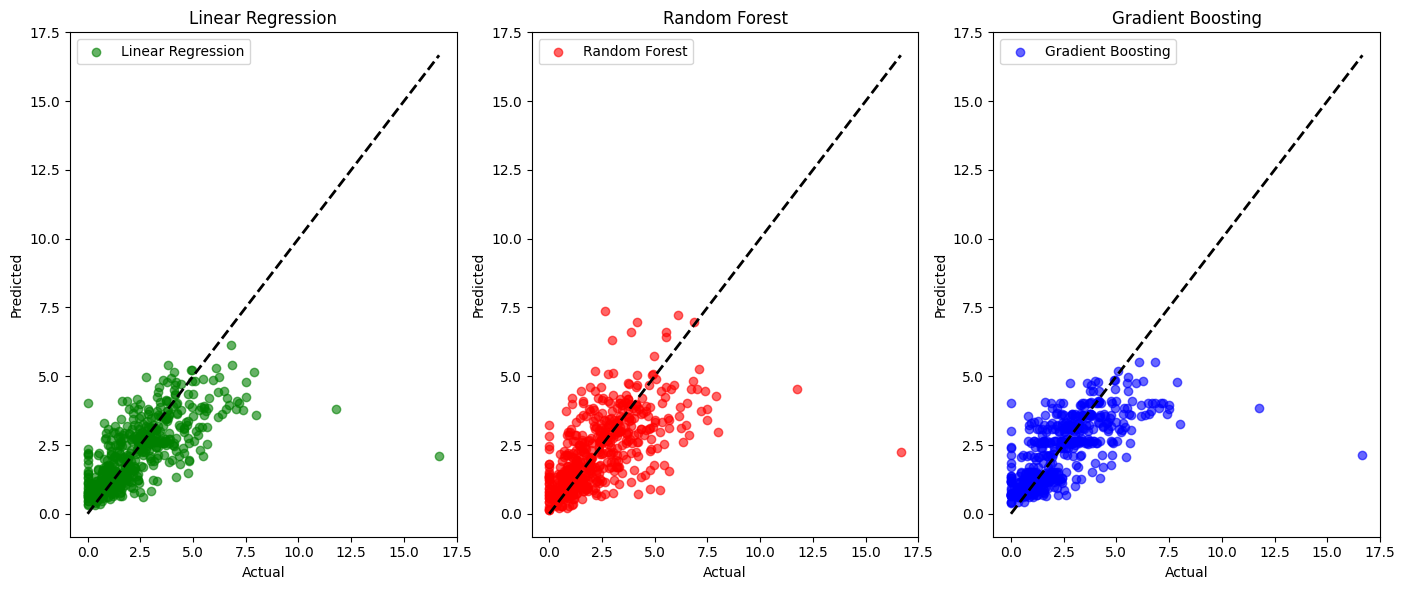

In [116]:
## Visual Comparison of all 3 models
y_pred_lr = model_lr.predict(X_test_scaled)  # Linear Regression predictions
y_pred_rf = model_rf.predict(X_test_scaled)  # Random Forest predictions
y_pred_gbm = best_gbm.predict(X_test_scaled)  # Gradient Boosting predictions

# Plotting the results
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='green', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.legend()

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='red', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')
plt.legend()

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gbm, alpha=0.6, color='blue', label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting')
plt.legend()

plt.tight_layout()
plt.show()


**Data Points Relative to the Line:** 
The closer the data points are to the dashed line (which represents perfect predictions), the more accurate the model's predictions are for those points.

**Spread of Data Points:** 
The scatter of points gives an indication of variance in the predictions. A tighter cluster along the diagonal suggests higher accuracy.

**Outliers:** Points that are far from the diagonal line could be considered outliers or instances where the model's predictions deviate significantly from the actual values.

**Outcome:**

The model has a decent number of predictions close to the line, indicating accurate predictions for those instances. Linear Regression model shows the best results compared to others.

There is a spread that grows as the actual observed mortality rate increases, suggesting the model might be less accurate at higher mortality rates.

The model seems to be fairly consistent with predictions for lower mortality rates, but the spread increases with higher rates.

In [117]:
# Get the predicted mortality rates for each procedure from each model
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_gbm = model_gbm.predict(X_test_scaled)

# Calculate the average predicted mortality rate for each procedure across all models
average_predicted_mortality = (y_pred_lr + y_pred_rf + y_pred_gbm) / 3

# Find the procedure with the lowest average predicted mortality rate
best_procedure_index = np.argmin(average_predicted_mortality)
best_procedure = df['Procedure'].iloc[best_procedure_index]

print(f"The best procedure is: {best_procedure}")


The best procedure is: All PCI


**In practice, this analysis could be used by healthcare professionals or hospital administrators to estimate and compare the expected mortality rates for various procedures across different facilities, aiding in decision-making processes about where to direct patients or how to improve certain procedures.**

**Model 2:**

Doing Time Series analysis for predicting the mortality rates taking the first 5 years as input data set and then predicting for the next five years. This way we can develop a model to forecast about the mortality rates over the next few years

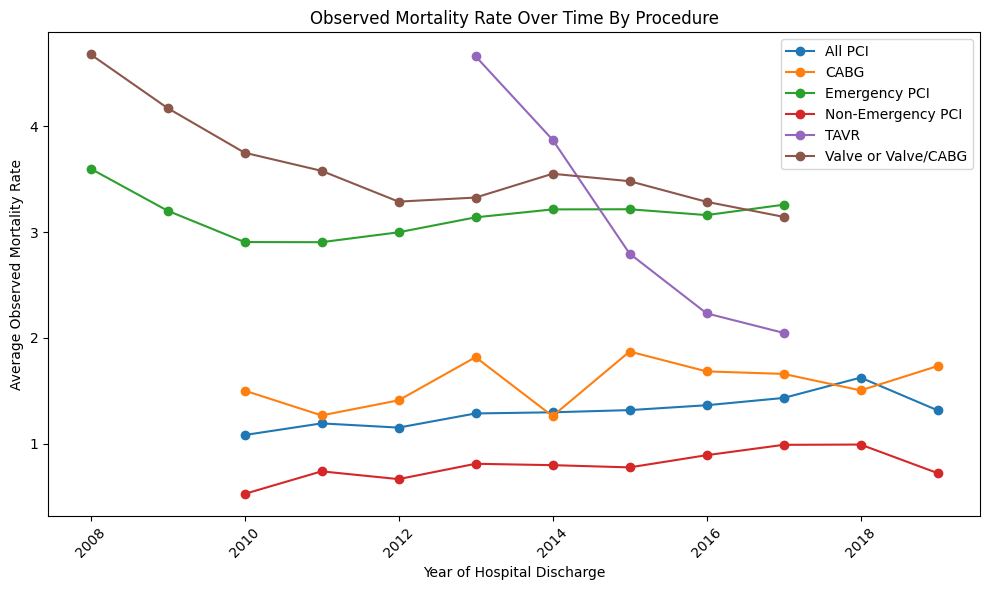

In [130]:
df = pd.read_csv('Cardiac_Surgery_and_Percutaneous_Coronary_Interventions_by_Hospital___Beginning_2008.csv')

# Apply the function to the 'Year of Hospital Discharge' column
df['Year of Hospital Discharge'] = df['Year of Hospital Discharge'].apply(extract_single_year)

# Convert the column to integer type
df['Year of Hospital Discharge'] = df['Year of Hospital Discharge'].astype(int)

# Group data by procedure and year
time_series_data = df.groupby(['Procedure', 'Year of Hospital Discharge'])['Observed Mortality Rate'].mean().reset_index()

# Creating a plot to understand about different procedures performed
plt.figure(figsize=(10, 6))  # Adjusting the size of the figure for readability

# Ploting each procedure to understand the trends
for procedure in time_series_data['Procedure'].unique():
    procedure_data = time_series_data[time_series_data['Procedure'] == procedure]
    plt.plot(procedure_data['Year of Hospital Discharge'], procedure_data['Observed Mortality Rate'], marker='o', label=procedure)

# Giving label names
plt.xlabel('Year of Hospital Discharge')
plt.ylabel('Average Observed Mortality Rate')
plt.title('Observed Mortality Rate Over Time By Procedure')
plt.legend()

# 
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility so that it dosent become clumsy

# Ploting the graph 
plt.tight_layout()  # Used to adjust the spacing
plt.show()

**CABG (Coronary Artery Bypass Grafting):** The mortality rate for CABG has decreased significantly over time. This improvement may be due to advancements in surgical techniques, better post-operative care, or changes in patient selection.

**All PCI (Percutaneous Coronary Intervention):** The mortality rate for All PCI shows a fluctuating trend but generally decreases over time.This procedure includes various minimally invasive interventions for coronary artery disease (e.g., angioplasty, stenting).

**Emergency PCI:** The mortality rate for Emergency PCI also fluctuates but generally decreases over time. Emergency PCI is performed during acute coronary events (e.g. heart attacks).

**Non-Emergency PCI:** Non-Emergency PCI has a relatively stable mortality rate over the years. This procedure is typically elective and planned for patients with stable coronary disease.

**TAVR (Transcatheter Aortic Valve Replacement):** TAVR is introduced around 2012 (marked by a sudden drop in mortality rate). The mortality rate for TAVR shows a decreasing trend over time. TAVR is a less invasive alternative to surgical aortic valve replacement.

**Valve or Valve/CABG:** The mortality rate for Valve or Valve/CABG also shows a decrease over time.This procedure involves heart valve replacement or repair, often combined with CABG.

We are interested in studying more about the TAVR method as it shows sudden fall in the mortality rate. For this purpose we implement Time series analysis to check the trends in the model and how these trends would help in forecasting future mortalities.

                            Number of Deaths  Number of Cases
Year of Hospital Discharge                                   
2008                                    3414            87702
2009                                    3212            88686
2010                                    4624           311034
2011                                    4654           296342
2012                                    4588           283232


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to conv

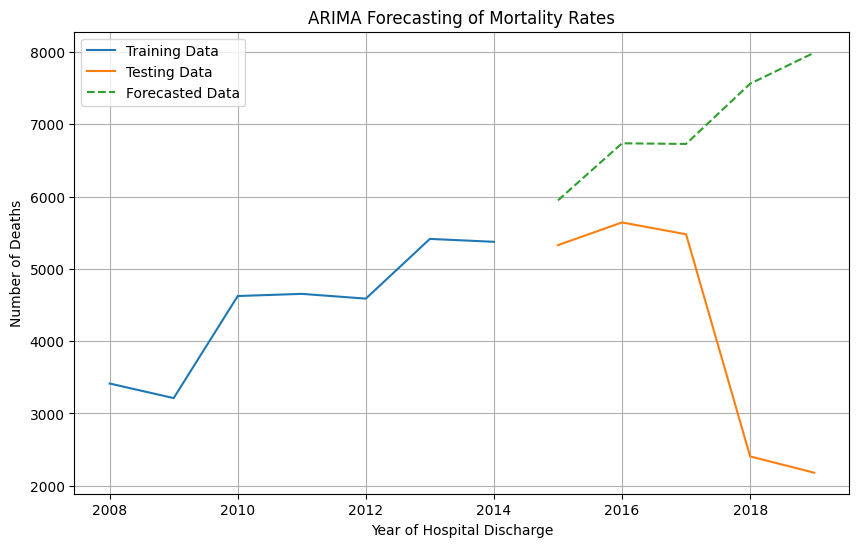

In [131]:
# Aggregating mortality data by year
mortality_by_year = df.groupby('Year of Hospital Discharge').agg({'Number of Deaths': 'sum', 'Number of Cases': 'sum'})

# Displaying the first few rows of the aggregated data to understand about the frequency distribution of the data
print(mortality_by_year.head())

# Spliting the data into training and testing sets (e.g., using the first few years for training and rest years for testing)
train_data = mortality_by_year.iloc[:-5]  # Using all first 5 years for training
test_data = mortality_by_year.iloc[-5:]   # Using the last 5 years for testing

# Defining the ARIMA model parameters (p, d, q)
p = 2  # Autoregressive order
d = 2  # Differencing order 
q = 2  # Moving average order

# Training the ARIMA model
model = ARIMA(train_data['Number of Deaths'], order=(p, d, q))
arima_model = model.fit()

# Forecasting future mortality rates for the next 5 years
forecast = arima_model.forecast(steps=len(test_data))

# Ploting the observed and forecasted mortality rates
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Number of Deaths'], label='Training Data')
plt.plot(test_data.index, test_data['Number of Deaths'], label='Testing Data')
plt.plot(test_data.index, forecast, label='Forecasted Data', linestyle='--')
plt.title('ARIMA Forecasting of Mortality Rates')
plt.xlabel('Year of Hospital Discharge')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()

**Our Approach:**

We made the Arima model to predict the mortality by training the model on first 5 years of data and then predicting the mortality rate for the next 5 years. On observing the plot we came to know that the ARIMA model predicts the mortality rate to grow linearly for the next 5 years but instead in the dataset there is some increase inititally but then there is sudden decrease in the mortality rates. We are interested to know why there is sudden decrease in the mortality rate in the years 2015-2019. After looking at the plot, we decided that there might be some effect of 'TAVR' procdeure that we saw in previous plots that might have resulted in decrease of the mortality rate. Further we thought of making another plot for identifying how many cases are being treated with TAVR procedure over the time period.

<Figure size 1200x800 with 0 Axes>

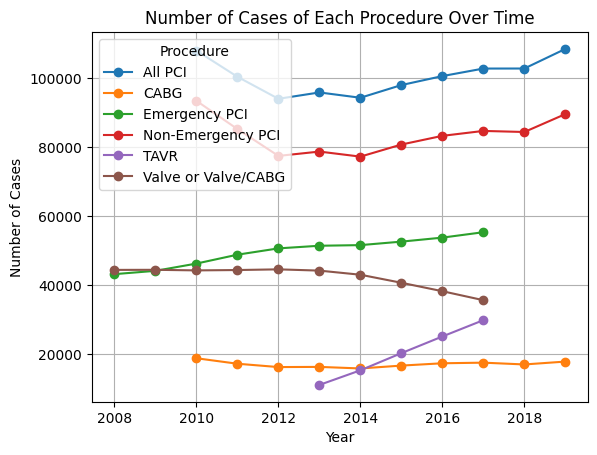

In [132]:
# Grouping by 'Year of Hospital Discharge' and 'Procedure' and sum the number of cases
procedures_by_time = df.groupby(['Year of Hospital Discharge', 'Procedure']).agg({'Number of Cases': 'sum'}).reset_index()

# The dataframe to have 'Year of Hospital Discharge' as index and 'Procedure' as columns
pivot_table = procedures_by_time.pivot(index='Year of Hospital Discharge', columns='Procedure', values='Number of Cases')

# Ploting the number of cases for each procedure over time
plt.figure(figsize=(12, 8))
pivot_table.plot(marker='o', linestyle='-')
plt.title('Number of Cases of Each Procedure Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend(title='Procedure')
plt.show()


**Analysis from output**

On plotting the graph between number of cases and the year of hospital discharge, we came to know that the number of cases that are treated with TAVR have been increasing year on year. With increase in number of cases and decrease in mortality rate, we came to the conclusion that TAVR is quite effective method or procedure to deal with heart releated problems. Although, All PCI have been the most successfull over the whole time period but over the time period as the technology has grown, TAVR has made significant improvements and has resulted in decrease in the number of deaths and mortality rate.Trends for PCI have been more in constant direction showing no significant improvements. In general Tavr and PCI procedures go hand in hand when we look at the medical procedures as PCI procedure is still needed in some cases that are opertated by TAVR procedure. We conclude that TAVR process is growing and have high impacts on reducing the mortality rate